In [1]:
#Connect to google drive...for any file requirement
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import os

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray, save
from numpy import load
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
# Load data
X = load('/content/drive/MyDrive/LablFiles/CNN_Project_1/train.npy')
y = load('/content/drive/MyDrive/LablFiles/CNN_Project_1/y_train.npy')

In [4]:
# Check shape
X.shape

(4750, 256, 256, 3)

In [5]:
y.shape

(4750,)

Due to huge dataset, the colab session and also on my machine session is crashing again and again. So using below code I am considering only 30% of data for futher processing. For this I am using train-test-split function to pick 30% of data

In [5]:
target = y
features = X
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(features, target, stratify=target, test_size=0.7, random_state=10)

In [6]:
X= X_train_small
y=y_train_small

In [7]:
X.shape

(1425, 256, 256, 3)

In [8]:
y.shape

(1425,)

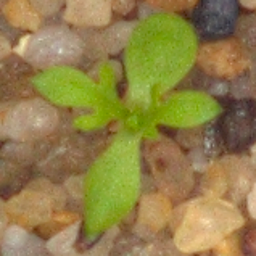

In [11]:
new_image = tf.keras.preprocessing.image.array_to_img(X[55])
#Show image
new_image

Preprocessing

In [12]:
#Check for null values
np.isnan(X).sum()

0

In [11]:
(unique, counts) = np.unique(y, return_counts=True)

In [12]:
print(unique)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 79 117  86 183  66 143 196  66 155  69 149 116]


**A) Train and test model using Supervised learning models**

**1) KNN model**

In [15]:
#Lets spli X and y data set into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#X = load('/content/drive/MyDrive/LablFiles/CNN_Project_1/train.npy')
#y = load('/content/drive/MyDrive/LablFiles/CNN_Project_1/y_train.npy')

target = y
features = X
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3, random_state=10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train.reshape(X_train.shape[0], 196608)
X_test = X_test.reshape(X_test.shape[0], 196608)

#data normalisation
X_train = X_train / 255.0
X_test = X_test / 255.0

# Let do one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
NoOfClasses = y_test.shape[1]

In [16]:
error =[]
neighbours = []

def KNN(k):
    from sklearn.neighbors import KNeighborsClassifier
    knnmodel = KNeighborsClassifier(n_neighbors= k , weights = 'uniform', metric='euclidean')
    knnmodel.fit(X_train, y_train)
    predicted_labels = knnmodel.predict(X_train)    
    score = accuracy_score(y_train, predicted_labels)
    MSE = 1-score
    error.append(MSE)
    neighbours.append(k)
    print(score)

In [17]:
for i in range(1,6,2):
    KNN(i)

1.0
0.35037593984962406
0.19774436090225564


**2) SVM model**

In [13]:
#Lets spli X and y data set into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

target = y
features = X

features = features.reshape(features.shape[0], 196608)

scalar = StandardScaler()
features_tran = scalar.fit_transform(features)
pca = PCA(n_components=500)
features_pca = scalar.fit_transform(features_tran)
# look at new shape
print('PCA matrix shape is: ', features_pca.shape)

PCA matrix shape is:  (1425, 196608)


In [14]:
X = pd.DataFrame(features_pca)
y = pd.Series(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1010)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

6     133
3     129
10    110
8     110
5      96
11     85
1      85
2      64
0      55
9      46
7      44
4      40
dtype: int64

In [16]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
# Make predictions
y_pred = svm.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy : ', accuracy)

Model accuracy :  0.42757009345794394


**B) Train and test model using ANN model**

In [4]:
#Lets spli X and y data set into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics

target = y
features = X

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3, random_state=10)

# Let do normlization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# Let do one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
NoOfClasses = y_test.shape[1]

In [5]:
#Let build ANN model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.activations import relu
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
# Lets build model
tf.keras.backend.clear_session()

modelann = Sequential()
modelann.add(Flatten(input_shape=(256,256,3)))       #Flatten image of size 224*224*3 into an array of 150528
modelann.add(Dense(400,activation='relu', input_shape=(196608,)))
modelann.add(Dense(500,activation='relu'))
modelann.add(Dense(400,activation='relu'))
modelann.add(Dense(500,activation='relu'))
#modelann.add(Dense(100,activation='relu'))
modelann.add(Dropout(0.25))
#modelann.add(Dense(100,activation='relu'))
modelann.add(Dense(NoOfClasses, activation='softmax'))
Epochs = 30
Batchsize = 40

modelann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
CallbackList = [earlyStopping]
#Saving the best model using model checkpoint callback
modelann_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/LablFiles/CNN_Project_1/Models/model_ann.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)
print(modelann.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense (Dense)                (None, 400)               78643600  
_________________________________________________________________
dense_1 (Dense)              (None, 500)               200500    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               200500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                6

In [7]:
modelann.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=Epochs, batch_size=Batchsize, callbacks=modelann_checkpoint)

Epoch 1/30
84/84 [==============================] - 7s 44ms/step - loss: 14.8517 - accuracy: 0.0970 - val_loss: 2.6185 - val_accuracy: 0.0554

Epoch 00001: val_accuracy improved from -inf to 0.05544, saving model to /content/drive/MyDrive/LablFiles/CNN_Project_1/Models/model_ann.h5
Epoch 2/30
84/84 [==============================] - 4s 42ms/step - loss: 2.4841 - accuracy: 0.1321 - val_loss: 2.2567 - val_accuracy: 0.2351

Epoch 00002: val_accuracy improved from 0.05544 to 0.23509, saving model to /content/drive/MyDrive/LablFiles/CNN_Project_1/Models/model_ann.h5
Epoch 3/30
84/84 [==============================] - 3s 40ms/step - loss: 2.2498 - accuracy: 0.2118 - val_loss: 2.1236 - val_accuracy: 0.2449

Epoch 00003: val_accuracy improved from 0.23509 to 0.24491, saving model to /content/drive/MyDrive/LablFiles/CNN_Project_1/Models/model_ann.h5
Epoch 4/30
84/84 [==============================] - 3s 41ms/step - loss: 2.1617 - accuracy: 0.2131 - val_loss: 2.3679 - val_accuracy: 0.1698

Epoch

In [12]:
_,acc=modelann.evaluate(X_train,y_train)
print(acc*100)

104/104 [==============================] - 2s 14ms/step - loss: 0.8996 - accuracy: 0.6821
68.21052432060242


In [8]:
_,acc=modelann.evaluate(X_test,y_test)
print(acc*100)

45/45 [==============================] - 1s 15ms/step - loss: 1.4545 - accuracy: 0.4919
49.1929829120636


Comments : The Dense layer netwrok give better accuracy (both training and validation) than supervised model

**C) Train and test model using CNN model**

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape, Convolution2D, MaxPooling2D

target = y
features = X
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3, random_state=10)

# Let do normlization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0],256,256,3)
X_test = X_test.reshape(X_test.shape[0],256,256,3)

# Let do one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [8]:
# Lets build model based CNN
tf.keras.backend.clear_session()
#Initialise model
modelcnn = tf.keras.models.Sequential()
#1st convolutional layer
modelcnn.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
#2nd convolutional layer
#modelcnn.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
#3rd convolutional layer
modelcnn.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'))

modelcnn.add(Dropout(0.25))

#Add max pool layer
modelcnn.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the output
modelcnn.add(tf.keras.layers.Flatten())
#fully connected layer
modelcnn.add(tf.keras.layers.Dense(64, activation='relu'))
#Output layer
modelcnn.add(tf.keras.layers.Dense(12, activation='softmax'))

modelcnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list=[early_stopping]

#Saving the best model using model checkpoint callback
modelcnn_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/LablFiles/CNN_Project_1/Models/model_cnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

modelcnn.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=30, batch_size=128, callbacks=[modelcnn_checkpoint])

print(modelcnn.summary())

Epoch 1/30
26/26 [==============================] - 57s 835ms/step - loss: 12.9196 - accuracy: 0.1312 - val_loss: 2.0500 - val_accuracy: 0.3291

Epoch 00001: val_accuracy improved from -inf to 0.32912, saving model to /content/drive/MyDrive/LablFiles/CNN_Project_1/Models/model_cnn.h5
Epoch 2/30
26/26 [==============================] - 18s 698ms/step - loss: 1.7476 - accuracy: 0.4138 - val_loss: 1.5522 - val_accuracy: 0.4751

Epoch 00002: val_accuracy improved from 0.32912 to 0.47509, saving model to /content/drive/MyDrive/LablFiles/CNN_Project_1/Models/model_cnn.h5
Epoch 3/30
26/26 [==============================] - 18s 689ms/step - loss: 1.1811 - accuracy: 0.6126 - val_loss: 1.2312 - val_accuracy: 0.5916

Epoch 00003: val_accuracy improved from 0.47509 to 0.59158, saving model to /content/drive/MyDrive/LablFiles/CNN_Project_1/Models/model_cnn.h5
Epoch 4/30
26/26 [==============================] - 18s 694ms/step - loss: 0.7208 - accuracy: 0.7754 - val_loss: 1.1546 - val_accuracy: 0.609

In [9]:
_,acc=modelcnn.evaluate(X_train,y_train)
print(acc*100)

104/104 [==============================] - 6s 47ms/step - loss: 5.3522e-04 - accuracy: 1.0000
100.0


In [10]:
_,acc=modelcnn.evaluate(X_test,y_test)
print(acc*100)

45/45 [==============================] - 2s 40ms/step - loss: 1.6842 - accuracy: 0.6421
64.21052813529968


**Result Comparison**
1) Supervised Model 
a) KNN Model - The accuracy descrases from 35% for 2 clusters to 19 % for 3 clusters. As the KNN model works based on distance metrics and lazy learner...as the number of dimensions increases, as in case of image, KNN is not right model for building ML model for images 
b) SVC - The model give accuracy around 42 % which is better than KNN model.

2) ANN (Dense layer model) 
The training accuracy =68% and test accuracy =49%. This is better than supervised models.

3) CNN model 
The training accuracy =100% and test accuracy =64%. This is bit overfit model.


**Best Performing Model**
Though CNN model is overfit model but it give higher test accuracy than dense layer and supervised models.

Explain in depth why CNN out performs neural networks which in turn out perform supervised learning
models when it comes to image classification. Use the markdown option in Jupiter for your answer.

Explanation :
CNN - CNN model performs better than neural networks, supevised models etc for building ML models for images due to following reasons
 1) The convolution process (sliding filer) over section of image results in capturing beighbourhood information
 2) The image input data (pixels values) is not flattened 
 3) The multiple filers (convolutional layers) does better job of creating features i.e. each filter does job of identifying
    spefic part of image

ANN (Dense Layer Models) - The dense layer models perform better than supervised model (SVM, KNN etc) due to following reasons
1) Generally dimension of the image ranges 100-2000...i.e. the pixels values denote features of image
   The architure of the ANN supports processing input data having huge number of dimensions using y = Wx+B equaltion 
   i.e. weightted sum of inputs values and then minimising loss function.
   On the other side supervised models like SVM, KNN work based on distance algorithms i.e. features are compared using 
   distiance metrics and this approach does not work well when then number of features grow beyond certain number as in case of 
   image data.